



#Understanding Data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
df.duplicated().sum()


np.int64(0)

/tmp/ipython-input-11-237825538.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


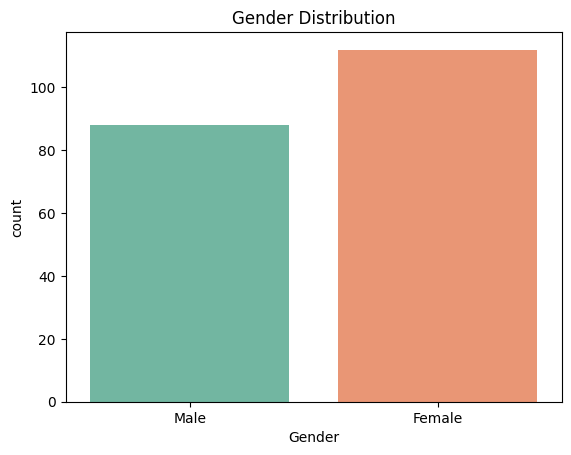

In [11]:
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

/tmp/ipython-input-12-3537018730.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Age', data=df, palette='Set2', kde=True, bins = 30)


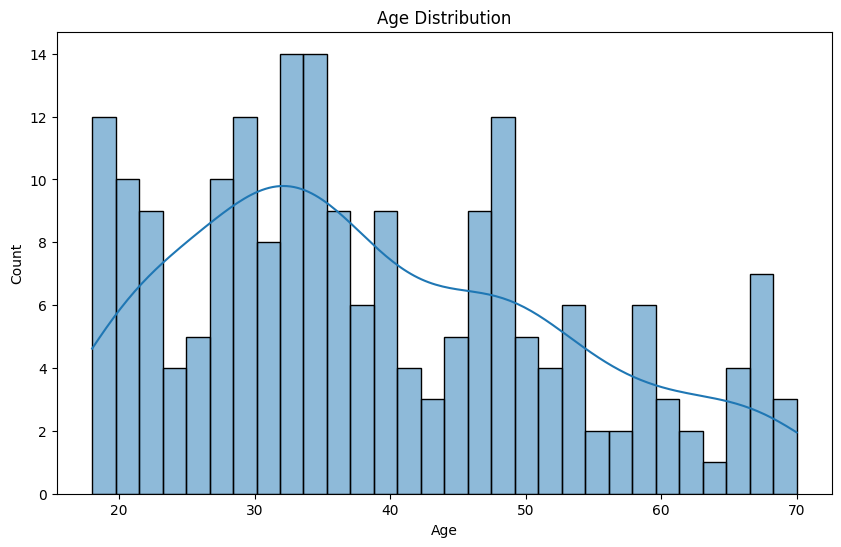

In [12]:
figsize=(10,6)
plt.figure(figsize=figsize)
sns.histplot(x='Age', data=df, palette='Set2', kde=True, bins = 30)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

/tmp/ipython-input-13-910092236.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=age_groups, palette='Set2')


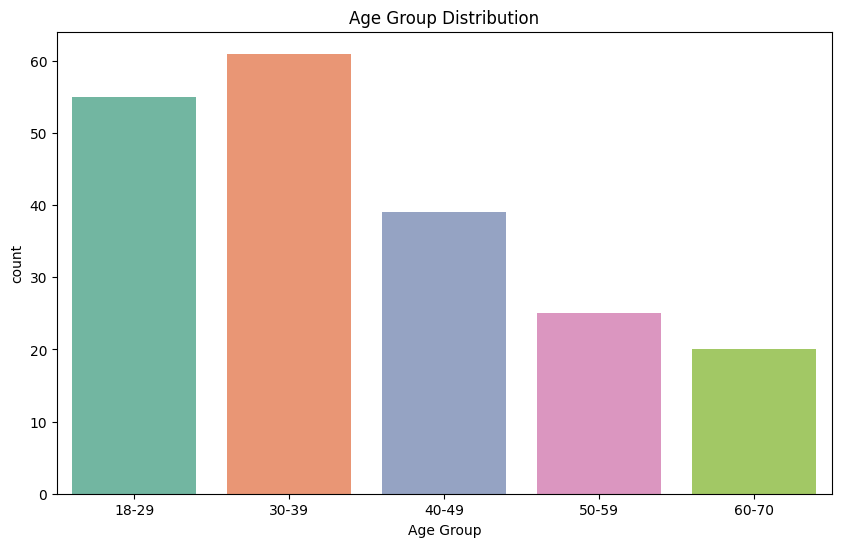

In [13]:
bins = [18, 30, 40, 50, 60, 71]
labels = ['18-29', '30-39', '40-49', '50-59', '60-70']

age_groups = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=figsize)
sns.countplot(x=age_groups, palette='Set2')
plt.xlabel('Age Group')
plt.title('Age Group Distribution')
plt.show()


/tmp/ipython-input-14-3982917967.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Annual Income (k$)', data=df, palette='Set2',kde=True, bins=30)


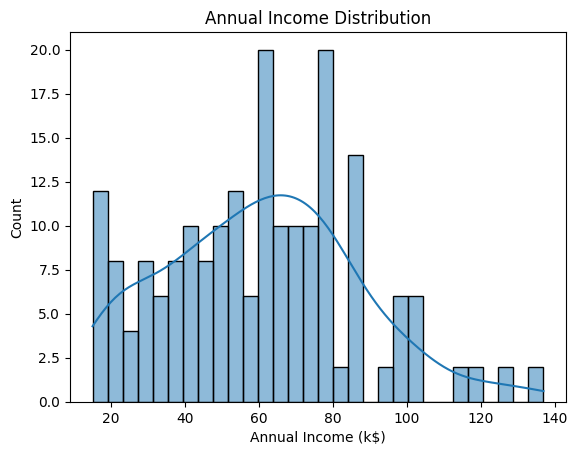

In [14]:
sns.histplot(x='Annual Income (k$)', data=df, palette='Set2',kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.show()

/tmp/ipython-input-15-4017579893.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Spending Score (1-100)', data=df, palette='Set2',bins=30,kde=True)


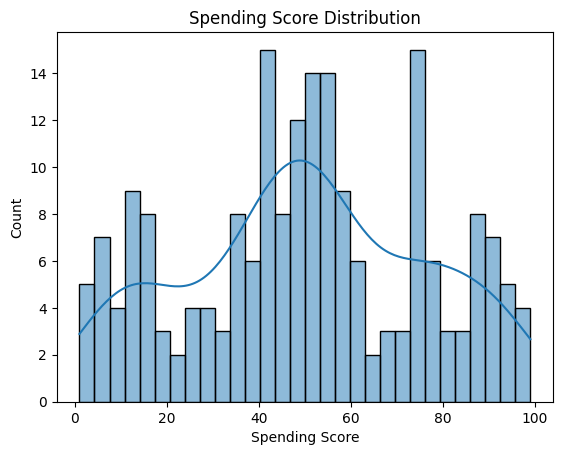

In [15]:
sns.histplot(x='Spending Score (1-100)', data=df, palette='Set2',bins=30,kde=True)
plt.xlabel('Spending Score')
plt.title('Spending Score Distribution')
plt.show()

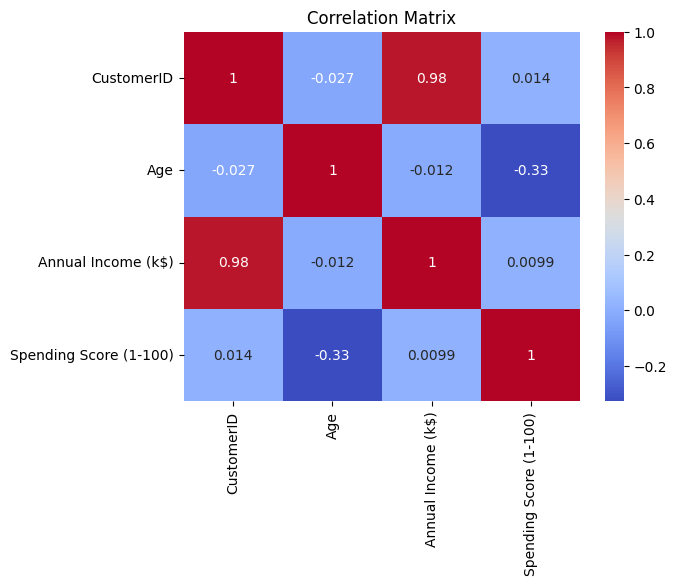

In [16]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

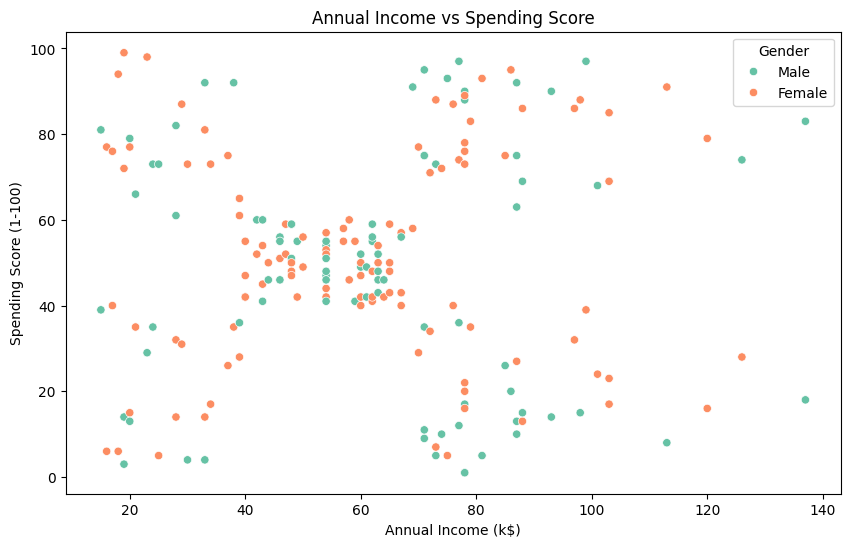

In [17]:
# plot between Annual Income (k$) and Spending Score (1-100) another plot not scatter and barplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='Set2')
plt.title('Annual Income vs Spending Score')
plt.show()




#Feature Engineering

In [18]:
df_clean = df.copy()
df_clean['Age']=np.log1p(df['Age'])

After

/tmp/ipython-input-19-3184520006.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Age', data=df_clean, palette='Set2', kde=True, bins = 30)


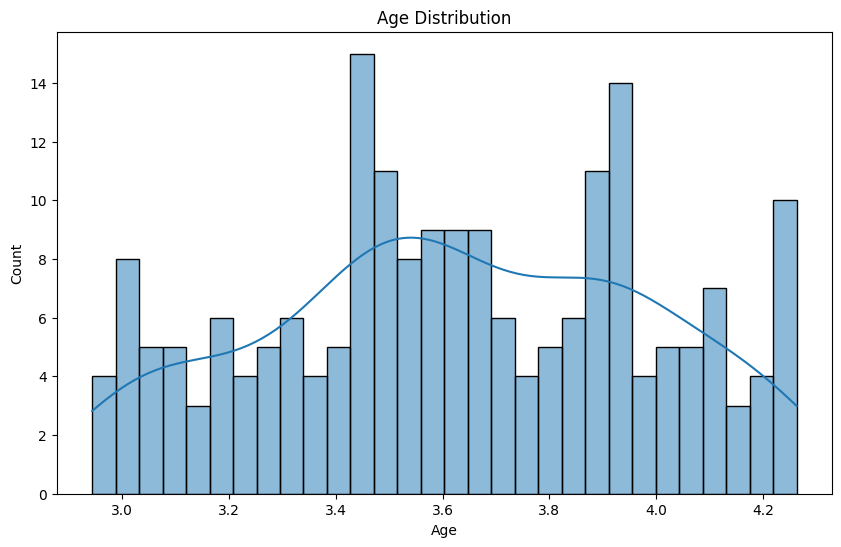

In [19]:
figsize=(10,6)
plt.figure(figsize=figsize)
sns.histplot(x='Age', data=df_clean, palette='Set2', kde=True, bins = 30)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

In [20]:
df_clean.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,2.995732,15,39
1,2,Male,3.091042,15,81
2,3,Female,3.044522,16,6
3,4,Female,3.178054,16,77
4,5,Female,3.465736,17,40


##Set index as CustomerID

In [21]:
df_clean.set_index('CustomerID', inplace=True)

# Encoding

In [22]:
df_clean = pd.get_dummies(df_clean, columns=['Gender'], drop_first=True, dtype=int)



In [23]:
df_clean.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,2.995732,15,39,1
2,3.091042,15,81,1
3,3.044522,16,6,0
4,3.178054,16,77,0
5,3.465736,17,40,0


# Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clean)
df_scaled = pd.DataFrame(df_scaled, columns=df_clean.columns, index=df_clean.index)



In [25]:
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,0.038910,0.000000,0.387755,1.0
2,0.111211,0.000000,0.816327,1.0
3,0.075922,0.008197,0.051020,0.0
4,0.177217,0.008197,0.775510,0.0
5,0.395449,0.016393,0.397959,0.0


In [26]:
df_scaled

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,0.038910,0.000000,0.387755,1.0
2,0.111211,0.000000,0.816327,1.0
3,0.075922,0.008197,0.051020,0.0
4,0.177217,0.008197,0.775510,0.0
5,0.395449,0.016393,0.397959,0.0
...,...,...,...,...
196,0.484798,0.860656,0.795918,0.0
197,0.670744,0.909836,0.275510,0.0
198,0.418792,0.909836,0.744898,1.0


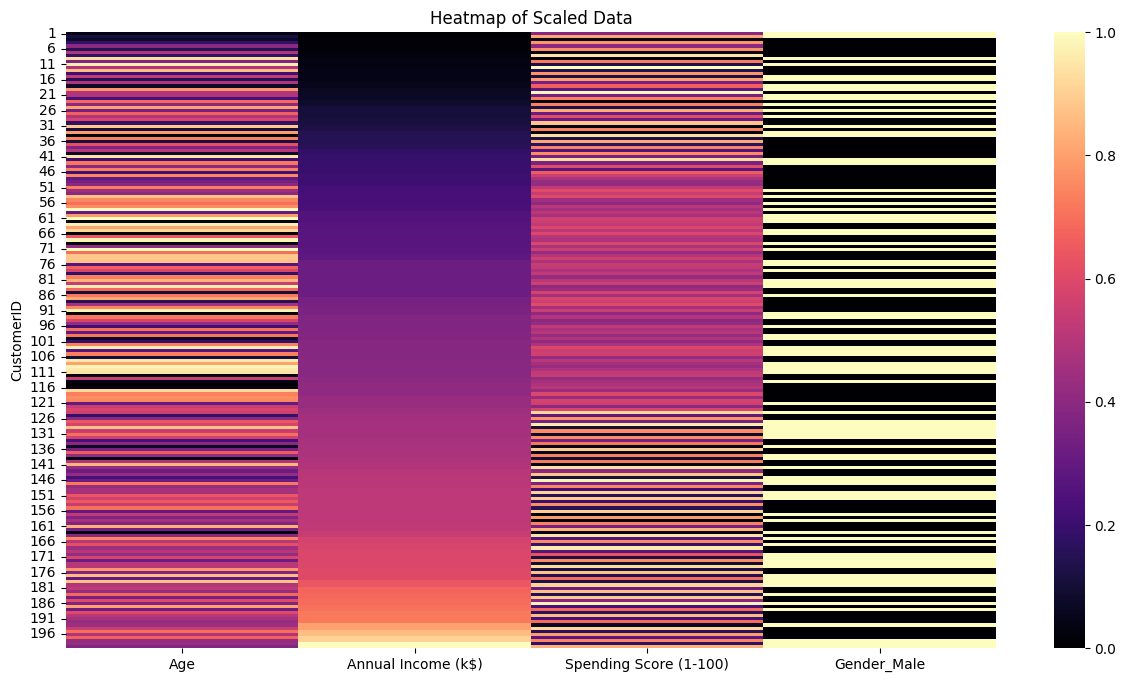

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df_scaled,cmap='magma')
plt.title('Heatmap of Scaled Data')
plt.show()

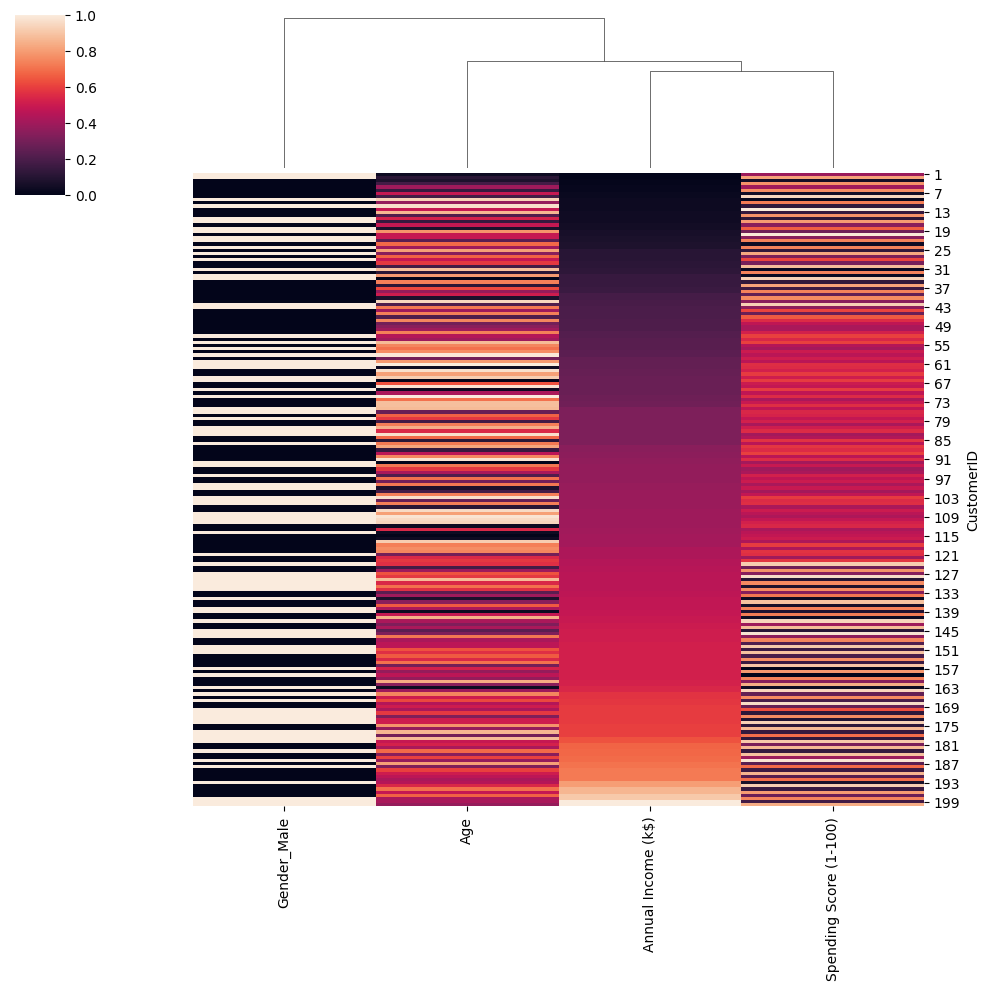

In [28]:
sns.clustermap(df_scaled,row_cluster=False)


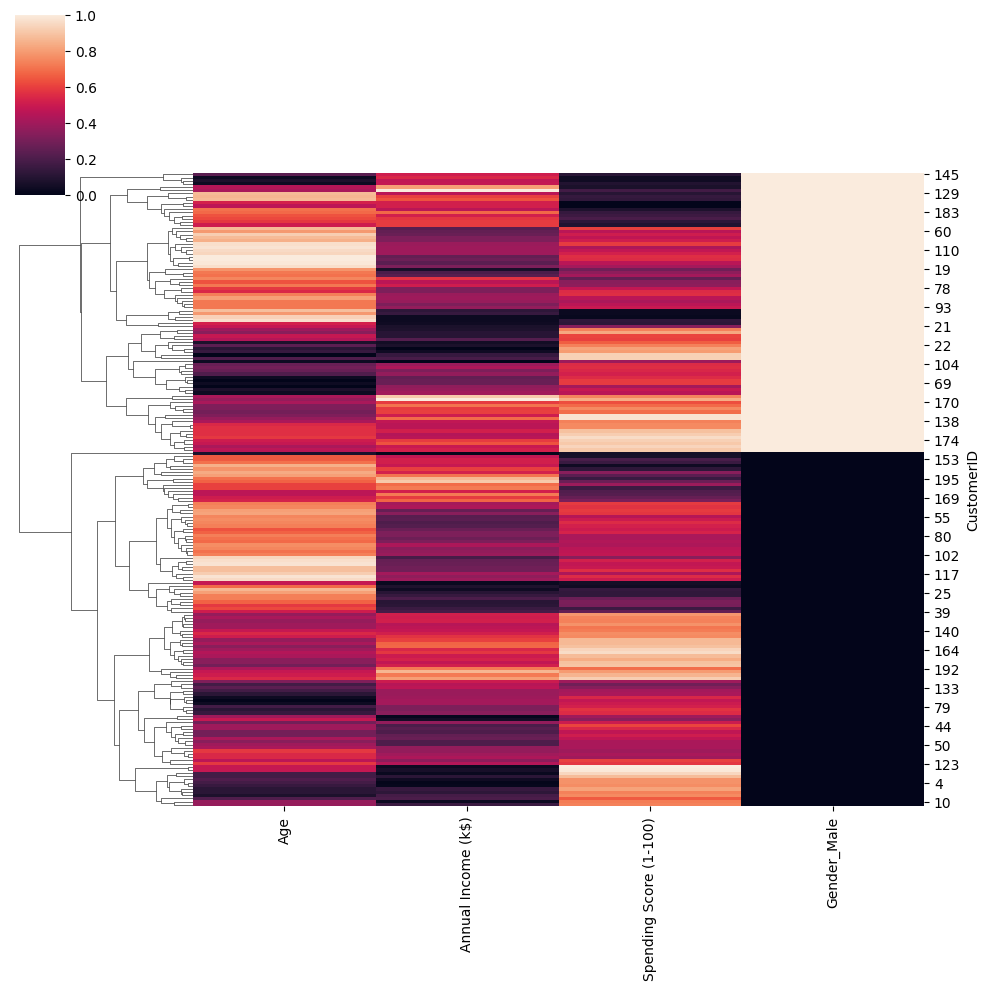

In [29]:
sns.clustermap(df_scaled,col_cluster=False)


In [30]:
len(df)

200

#Hierarchal Clustering Model

In [31]:
from sklearn.cluster import AgglomerativeClustering


In [32]:
model = AgglomerativeClustering(n_clusters=4)


In [33]:
cluster_labels = model.fit_predict(df_scaled)


In [34]:
cluster_labels

array([2, 2, 1, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       3, 3, 3, 2, 0, 3, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2])

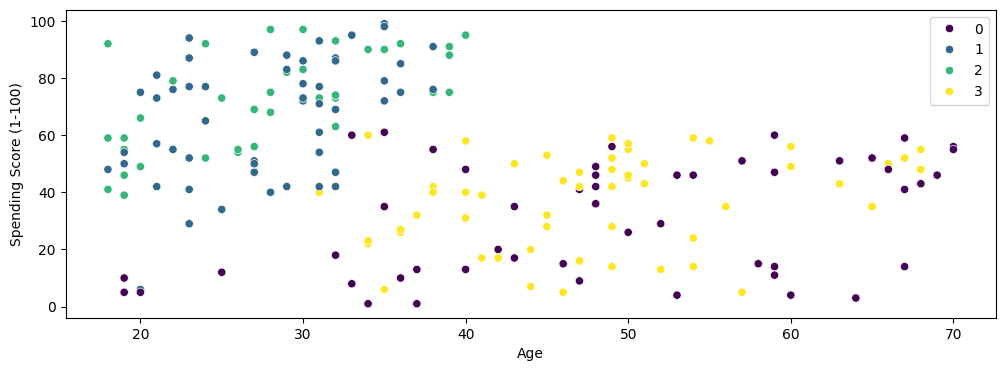

In [35]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue=cluster_labels,palette='viridis')
plt.title('')
plt.show()

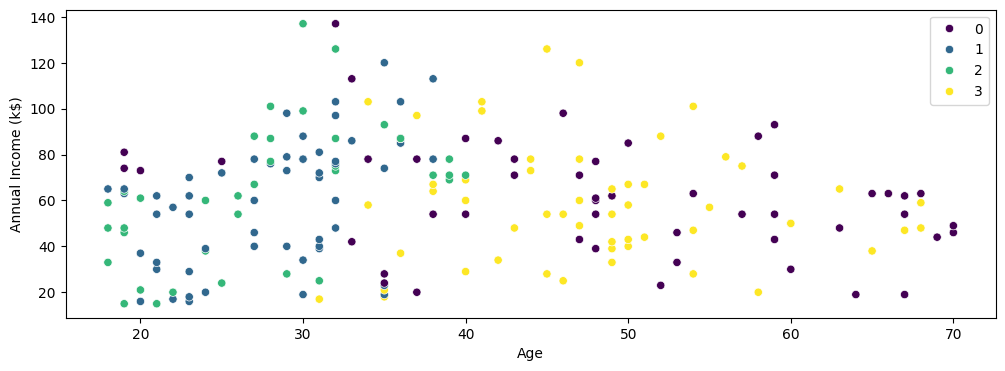

In [36]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)',hue=cluster_labels,palette='viridis')
plt.title('')
plt.show()

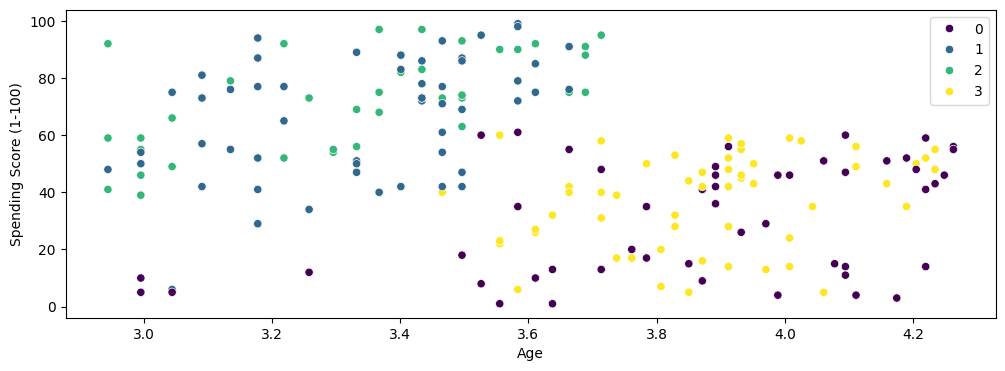

In [37]:
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(data=df_clean,x='Age',y='Spending Score (1-100)',hue=cluster_labels,palette='viridis')
plt.title('')
plt.show()

In [38]:
df_clean.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,2.995732,15,39,1
2,3.091042,15,81,1
3,3.044522,16,6,0
4,3.178054,16,77,0
5,3.465736,17,40,0


In [39]:
len(df_scaled.columns)

4

#Linkage Model

In [40]:
np.sqrt(len(df_scaled.columns))

np.float64(2.0)

In [41]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=2)


In [42]:
cluster_labels = model.fit_predict(df_scaled)


In [43]:
cluster_labels


array([3, 3, 0, 0, 2, 0, 2, 0, 4, 0, 4, 0, 2, 0, 4, 3, 2, 3, 4, 0, 4, 3,
       2, 3, 2, 3, 2, 4, 2, 0, 4, 0, 4, 3, 2, 0, 2, 0, 2, 0, 2, 3, 4, 0,
       2, 0, 2, 0, 0, 0, 2, 4, 0, 4, 2, 4, 2, 4, 0, 4, 4, 3, 2, 2, 4, 3,
       2, 2, 3, 0, 4, 2, 2, 2, 4, 3, 2, 4, 0, 2, 4, 4, 4, 2, 0, 4, 2, 0,
       2, 2, 2, 3, 4, 2, 0, 3, 2, 0, 4, 3, 0, 2, 4, 3, 4, 0, 2, 4, 4, 4,
       4, 0, 2, 3, 0, 0, 2, 2, 2, 2, 3, 2, 2, 6, 0, 5, 4, 6, 1, 6, 1, 6,
       0, 5, 1, 5, 7, 6, 1, 5, 7, 6, 0, 5, 1, 6, 4, 5, 7, 6, 1, 6, 7, 5,
       7, 5, 1, 5, 1, 5, 7, 5, 1, 5, 1, 5, 1, 5, 7, 6, 1, 6, 1, 6, 7, 5,
       1, 6, 1, 6, 7, 5, 1, 5, 7, 6, 7, 6, 7, 5, 7, 5, 1, 5, 7, 5, 7, 6,
       1, 6])

In [44]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [45]:
linkage_matrix = hierarchy.linkage(model.children_)


In [46]:
linkage_matrix

array([[  0.        , 111.        ,   1.41421356,   2.        ],
       [125.        , 136.        ,   1.41421356,   2.        ],
       [196.        , 197.        ,   1.41421356,   2.        ],
       [163.        , 164.        ,   1.41421356,   2.        ],
       [106.        , 121.        ,   1.41421356,   2.        ],
       [  7.        ,  18.        ,   2.23606798,   2.        ],
       [ 26.        ,  43.        ,   2.82842712,   2.        ],
       [ 92.        , 130.        ,   2.82842712,   2.        ],
       [ 45.        , 123.        ,   2.82842712,   2.        ],
       [ 73.        , 102.        ,   2.82842712,   2.        ],
       [112.        , 140.        ,   2.82842712,   2.        ],
       [ 15.        ,  57.        ,   3.16227766,   2.        ],
       [  8.        ,  10.        ,   3.16227766,   2.        ],
       [ 32.        ,  54.        ,   3.16227766,   2.        ],
       [ 27.        ,  31.        ,   3.16227766,   2.        ],
       [ 46.        ,  48

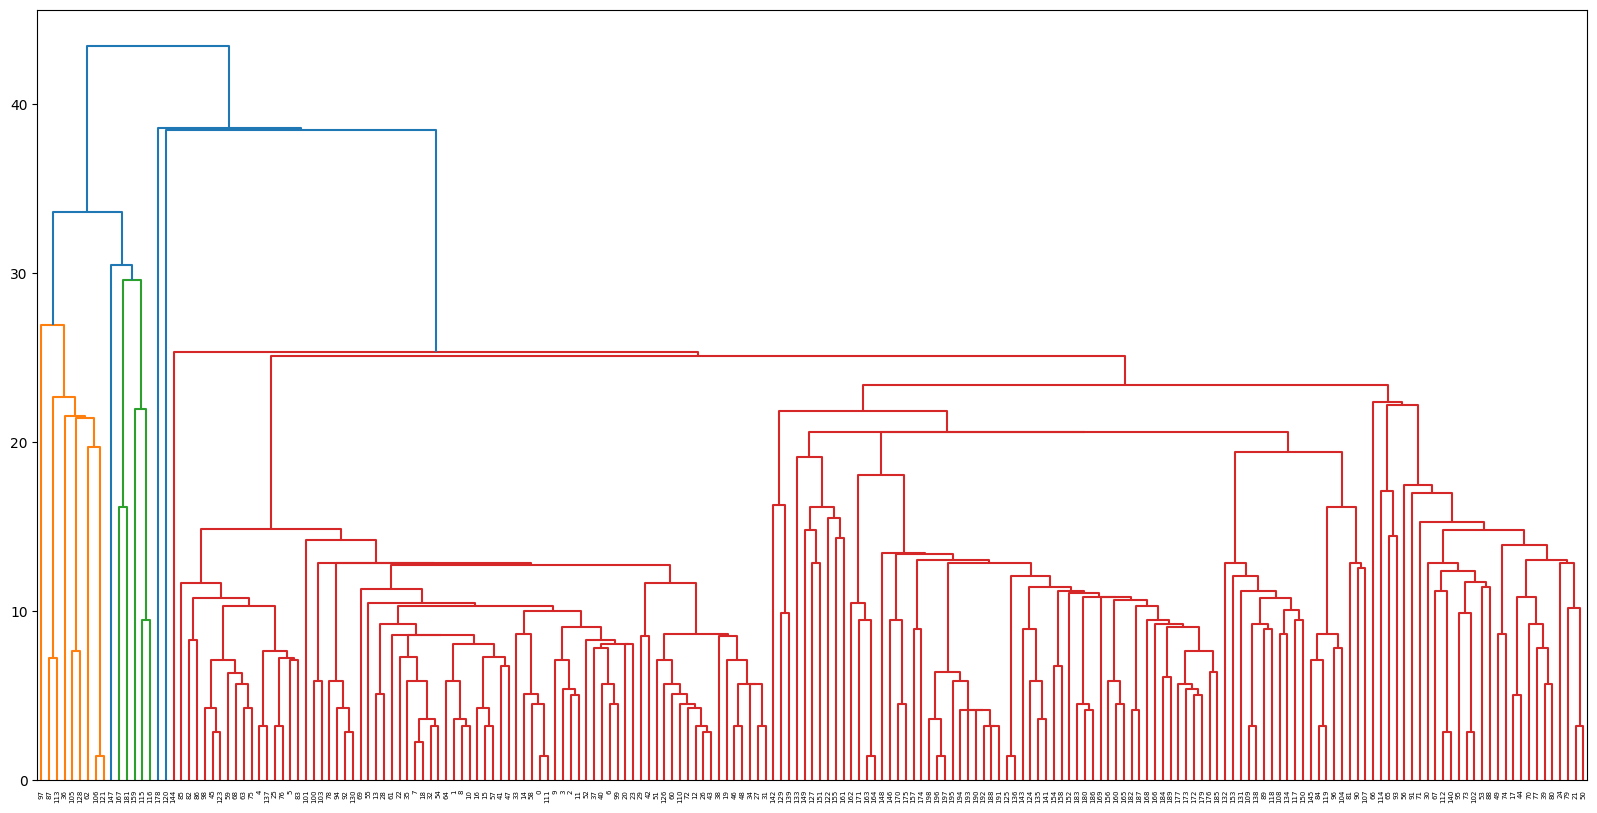

In [47]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix)

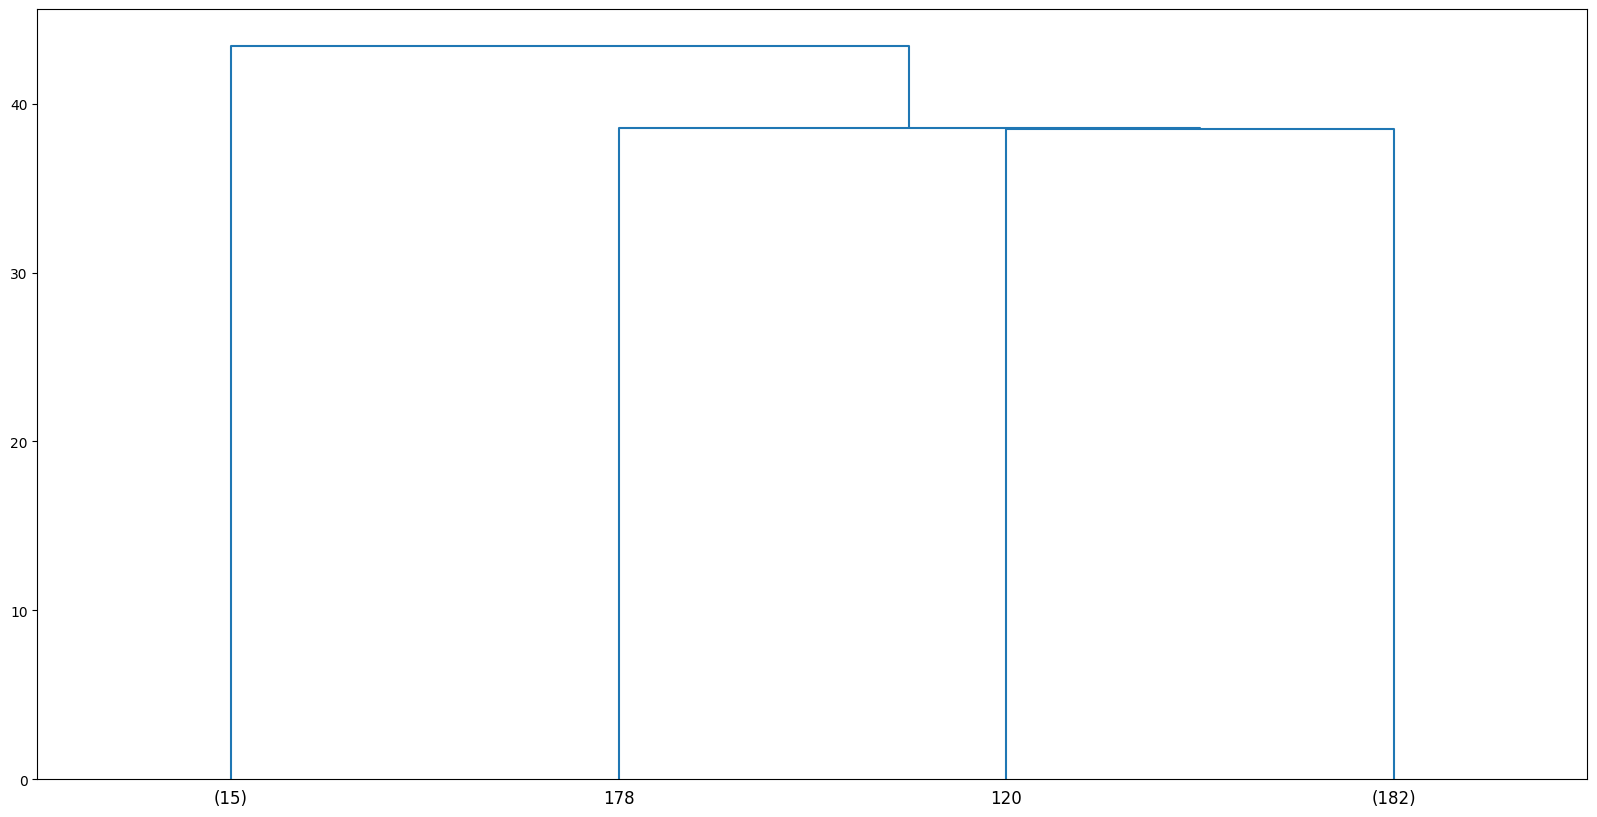

In [48]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=4)

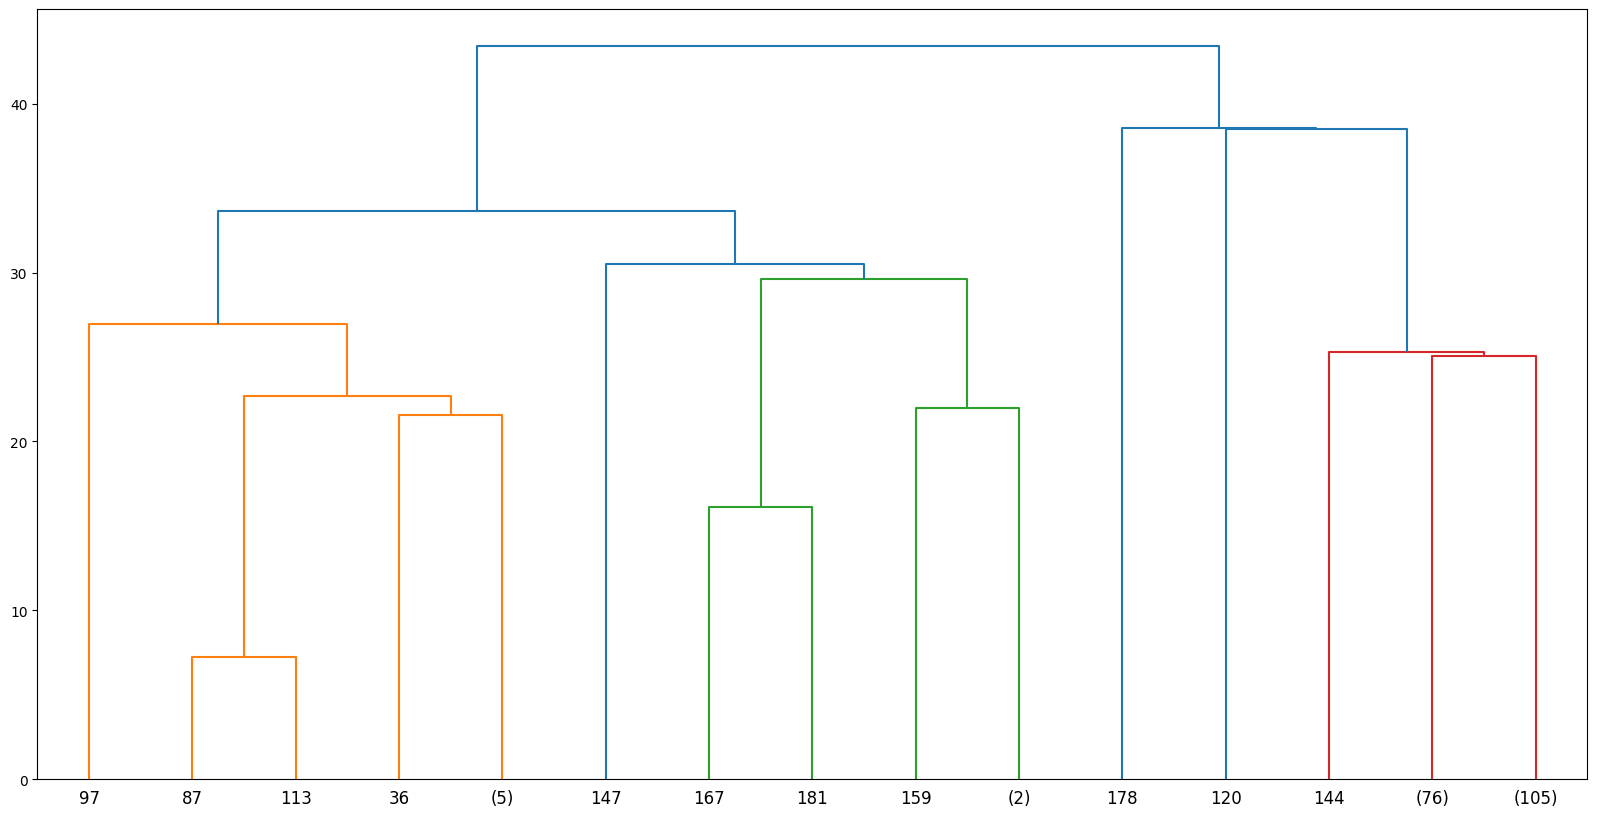

In [49]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.show()

In [50]:
len(df_scaled.columns)

4

In [51]:
np.sqrt(len(df_scaled.columns))

np.float64(2.0)

In [52]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,0.514808,0.270534,0.0,0.340062,0.505582,0.733996,1.0
Annual Income (k$),200.0,0.373443,0.215285,0.0,0.217213,0.381148,0.516393,1.0
Spending Score (1-100),200.0,0.502041,0.263505,0.0,0.344388,0.500000,0.734694,1.0
Gender_Male,200.0,0.440000,0.497633,0.0,0.000000,0.000000,1.000000,1.0


In [53]:
df_scaled['Spending Score (1-100)'].idxmax()


np.int64(12)

In [54]:
df_scaled['Spending Score (1-100)'].idxmin()


np.int64(157)

In [55]:
cus_a = df_scaled.iloc[11]
cus_b = df_scaled.iloc[156]


In [56]:
distance = np.linalg.norm(cus_a - cus_b)

In [57]:
distance

np.float64(1.4951780849979543)

# KMeans Clustring Model

In [58]:
from sklearn.cluster import KMeans


In [59]:
model = KMeans(n_clusters=4)


In [60]:
cluster_labels = model.fit_predict(df_scaled)


In [61]:
cluster_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 2, 3, 2, 3, 2, 3,
       1, 1, 0, 1, 1, 3, 0, 1, 1, 3, 1, 1, 0, 3, 2, 1, 1, 3, 2, 3, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 1,
       2, 3, 2, 3, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3,
       3, 3], dtype=int32)

In [62]:
ssd = []

for k in range(2,10):

    model = KMeans(n_clusters=k)


    model.fit(df_scaled)

    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

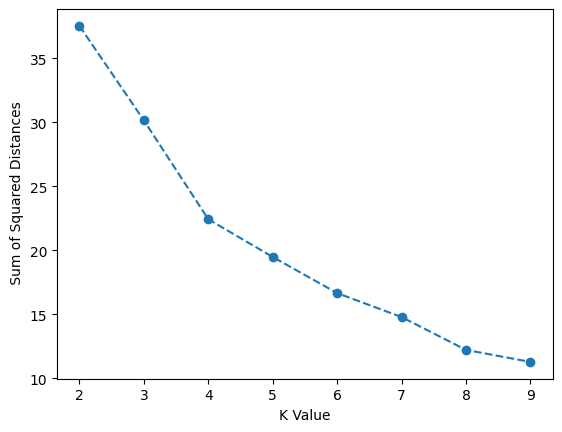

In [63]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<Axes: >

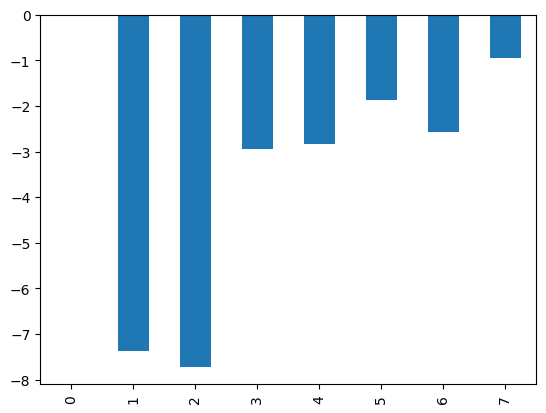

In [64]:
pd.Series(ssd).diff().plot(kind='bar')


In [65]:
df_scaled['Cluster'] = cluster_labels

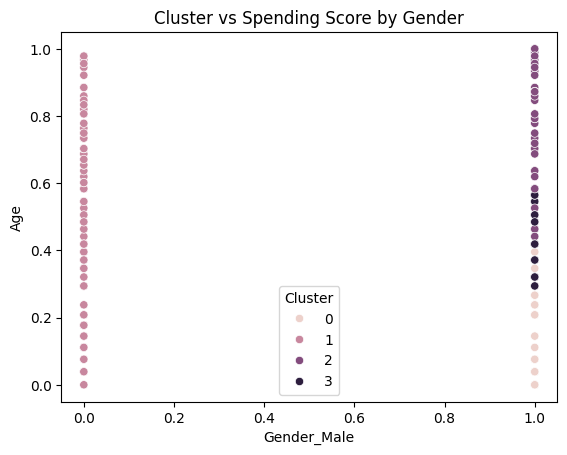

In [66]:
sns.scatterplot(x='Gender_Male', y='Age', hue='Cluster', data=df_scaled)
plt.title('Cluster vs Spending Score by Gender')
plt.show()

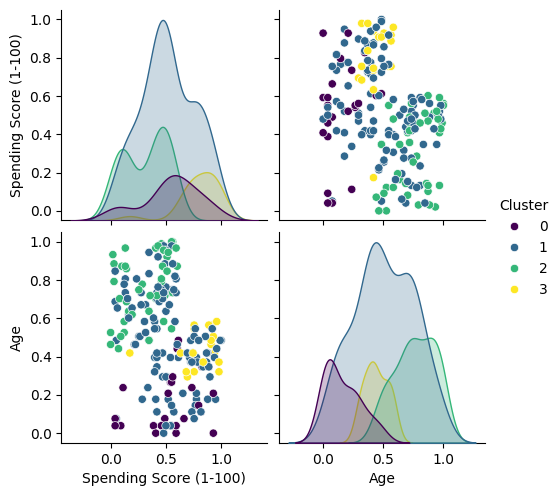

In [67]:
sns.pairplot(df_scaled, hue='Cluster', vars=['Spending Score (1-100)', 'Age',], palette='viridis')
plt.show()

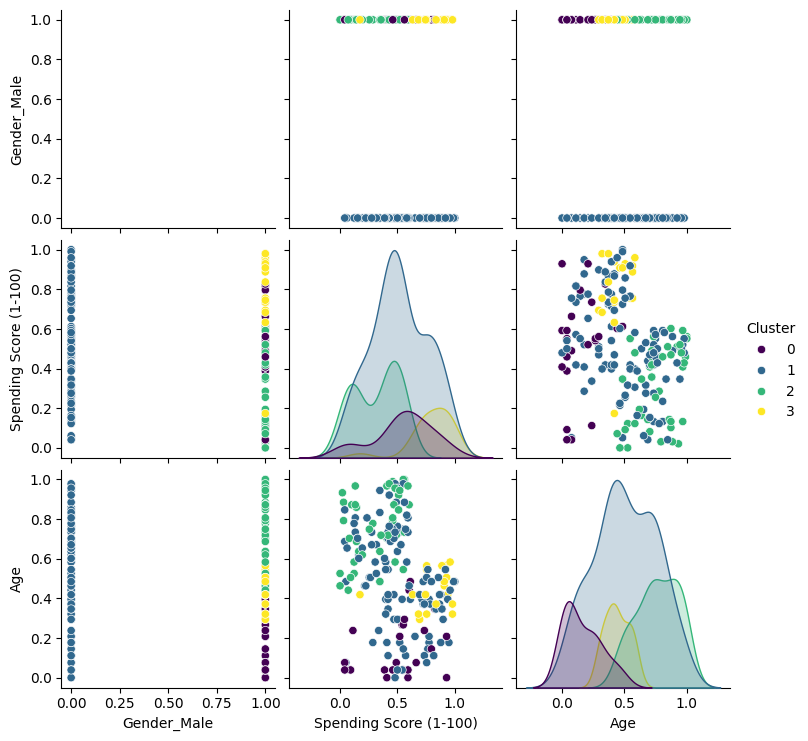

In [68]:
sns.pairplot(df_scaled, hue='Cluster', vars=['Gender_Male', 'Spending Score (1-100)','Age'], palette='viridis')
plt.show()